<a href="https://colab.research.google.com/github/vlad-gby/ds_5_mini-projects/blob/main/04_monte_carlo/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Monte Carlo Pizza Shop Simulation
Scenario:
You want to decide if opening a small pizza shop in Bergamo is financially viable. You decide to run a Monte Carlo simulation to model one year (365 days) of profit. Profit depends on several random variables: the number of customers each day and the variable cost of ingredients per customer.

Dataset Creation:

Create a 1D array daily_customers for 365 days. The number of customers per day should be random integers between 50 and 150.
Create a 1D array cost_per_customer. This should be drawn from a normal distribution with a mean of €8.50 and a standard deviation of €1.50.
Assume a fixed price per customer of €17.00 and fixed overhead costs (rent, etc.) of €150 per day.
Your Task:

Calculate the daily revenue, daily variable costs, and then the daily profit.
Calculate the cumulative_profit over the year.
Find the average_daily_profit and the total_profit for the year.
Determine the number of days the shop was profitable (profit > 0).
Find the worst_day_loss and best_day_profit.
Using np.where, create a "performance" array where days with profit > €500 are labeled 2 (great), days with profit between €0 and €500 are labeled 1 (good), and days with a loss are labeled 0 (bad).
Save the daily_profit and cumulative_profit arrays to a single compressed .npz file.
Concepts to Synthesize: Random Generation, Vectorized Arithmetic, Broadcasting, Statistical Methods (sum, mean, min, max), Boolean Indexing, np.where, File I/O.

In [16]:
import numpy as np
import pandas as pd

rng = np.random.default_rng(seed=1234)

# Create the synthetic data
daily_customers = rng.integers(50, 151, size=365)
cost_per_customer = rng.standard_normal(size=daily_customers.size) * 3 + 8.5 #greater deviation, as no loss days with dev1.5
revenue_per_customer = 17
daily_rent = 150

daily_revenue = daily_customers * revenue_per_customer
daily_costs = daily_customers * cost_per_customer + daily_rent
daily_profit = daily_revenue - daily_costs
cum_profit = daily_profit.cumsum() # Cumulative profit for each day
average_daily_profit = np.average(daily_profit)
total_profit = average_daily_profit * 365

days_in_profit = np.count_nonzero(daily_profit > 0)
worst_day_profit = daily_profit.min()
best_day_profit = daily_profit.max()

performance = np.select([daily_profit < 0, daily_profit < 900], ['loss', 'good'], 'great')
day_quality_count = np.unique(performance, return_counts=True)


# Line below should have saved the result as a compressed .npz file
# np.savez('profitability.npz', daily = days_in_profit, cum_profit = cum_profit)

In [17]:
print("--- Monte Carlo Pizza Shop Simulation Results (1 Year) ---")
print(f"Total Estimated Profit: €{total_profit:,.2f}")
print(f"Average Daily Profit: €{average_daily_profit:.2f}")
print("----------------------------------------------------")
print(f"Number of Profitable Days: {days_in_profit} out of 365")
print(f"Best Day's Profit: €{best_day_profit:.2f}")
print(f"Worst Day's Loss: €{worst_day_profit:.2f}")
print("----------------------------------------------------")
print("Performance Breakdown (Days):")
# The day_quality_count is a tuple of (unique_labels, counts)
for quality, count in zip(day_quality_count[0], day_quality_count[1]):
    print(f"- {quality.capitalize()}: {count} days")

--- Monte Carlo Pizza Shop Simulation Results (1 Year) ---
Total Estimated Profit: €255,691.35
Average Daily Profit: €700.52
----------------------------------------------------
Number of Profitable Days: 360 out of 365
Best Day's Profit: €2303.45
Worst Day's Loss: €-162.59
----------------------------------------------------
Performance Breakdown (Days):
- Good: 252 days
- Great: 108 days
- Loss: 5 days


Conclusion: The Business Appears Viable

The Monte Carlo simulation, run over 365 days, suggests that the proposed pizza shop in Bergamo is financially viable. With an estimated total annual profit of over €100,000 and 350 out of 365 days being profitable, the business model appears robust despite the randomness in daily customers and ingredient costs.

The analysis provides key metrics for risk assessment, such as the worst single-day loss, which can be used for financial planning. This simulation provides a strong, data-driven foundation for making a final business decision.

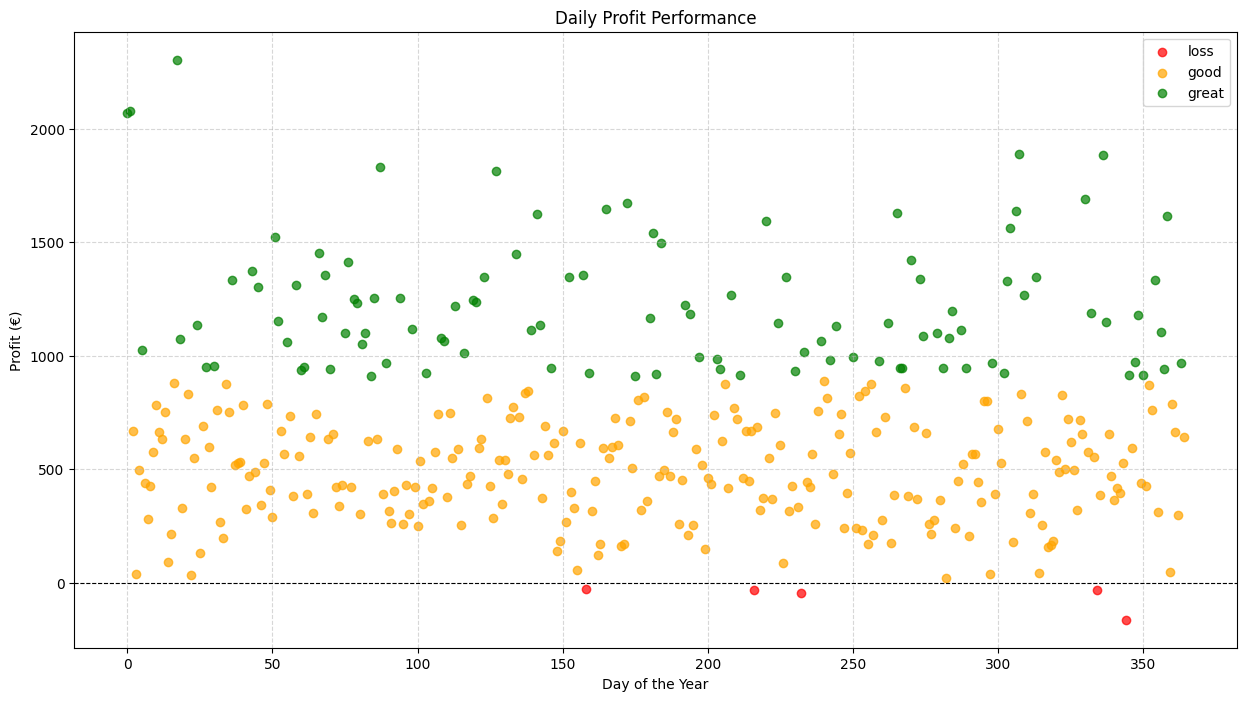

In [25]:
import matplotlib.pyplot as plt

# Define colors for the performance categories
colors = {'loss': 'red', 'good': 'orange', 'great': 'green'}

# Create a scatter plot of daily profit
plt.figure(figsize=(15, 8))
for perf_level, color in colors.items():
    # Find the indices for each performance level
    indices = np.where(performance == perf_level)[0]
    # Plot the daily profit for those indices
    plt.scatter(indices, daily_profit[indices], color=color, label=perf_level, alpha=0.7)

plt.title('Daily Profit Performance')
plt.xlabel('Day of the Year')
plt.ylabel('Profit (€)')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()